In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip imagens.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
 extracting: imagens/validation/004_deer/woodland_caribou_s_001564.png  
   creating: imagens/validation/005_dog/
 extracting: imagens/validation/005_dog/blenheim_spaniel_s_000006.png  
 extracting: imagens/validation/005_dog/blenheim_spaniel_s_000039.png  
 extracting: imagens/validation/005_dog/blenheim_spaniel_s_000107.png  
 extracting: imagens/validation/005_dog/blenheim_spaniel_s_000129.png  
 extracting: imagens/validation/005_dog/blenheim_spaniel_s_000232.png  
 extracting: imagens/validation/005_dog/blenheim_spaniel_s_000260.png  
 extracting: imagens/validation/005_dog/blenheim_spaniel_s_000268.png  
 extracting: imagens/validation/005_dog/blenheim_spaniel_s_000322.png  
 extracting: imagens/validation/005_dog/blenheim_spaniel_s_000325.png  
 extracting: imagens/validation/005_dog/blenheim_spaniel_s_000352.png  
 extracting: imagens/validation/005_dog/blenheim_spaniel_s_000365.png  
 extracting: imagens/validation/005

In [ ]:
import os
base_dir = '/content/imagens'  # Diretório base após descompactação
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
from keras.utils import image_dataset_from_directory
IMG_SIZE = 150
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
)
validation_dataset = image_dataset_from_directory(
    validation_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
)
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
)

Found 40000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
conv_base.trainable = False


data_augmentation = keras.Sequential(
 [
 layers.RandomFlip("horizontal"),
 layers.RandomRotation(0.1),
 layers.RandomZoom(0.2),
 ]
)

inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs, outputs)

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, TensorBoard

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=0.00001
)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [ ]:
model_checkpoint = ModelCheckpoint(
    filepath='models/ModelT_AdamOptimizerComData.h5',
    save_best_only=True,
    monitor='val_loss'
)


In [ ]:
callbacks = [reduce_lr, early_stopping, model_checkpoint]

history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=50,
    callbacks=callbacks
)

Epoch 1/50
1250/1250 [==============================] - 117s 87ms/step - loss: 1.9022 - accuracy: 0.5503 - val_loss: 0.6176 - val_accuracy: 0.7996 - lr: 1.0000e-04
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 111s 89ms/step - loss: 0.9402 - accuracy: 0.6970 - val_loss: 0.5170 - val_accuracy: 0.8361 - lr: 1.0000e-04
Epoch 3/50
1250/1250 [==============================] - 111s 89ms/step - loss: 0.8101 - accuracy: 0.7334 - val_loss: 0.4768 - val_accuracy: 0.8482 - lr: 1.0000e-04
Epoch 4/50
1250/1250 [==============================] - 112s 89ms/step - loss: 0.7455 - accuracy: 0.7548 - val_loss: 0.4585 - val_accuracy: 0.8572 - lr: 1.0000e-04
Epoch 5/50
1250/1250 [==============================] - 111s 89ms/step - loss: 0.6787 - accuracy: 0.7754 - val_loss: 0.4487 - val_accuracy: 0.8632 - lr: 1.0000e-04
Epoch 6/50
1250/1250 [==============================] - 111s 89ms/step - loss: 0.6473 - accuracy: 0.7868 - val_loss: 0.4396 - val_accuracy: 0.8636 - lr: 1.0000e-04
Epoch 7/50
1250/1250 [==============================] - 132s 105ms/step - loss: 0.6258 - accuracy: 0.7948 - val_loss: 0.4181 - val_accuracy: 0.8700 - lr: 1.0000e-04
Epoch 8/50
1250/1250 [====

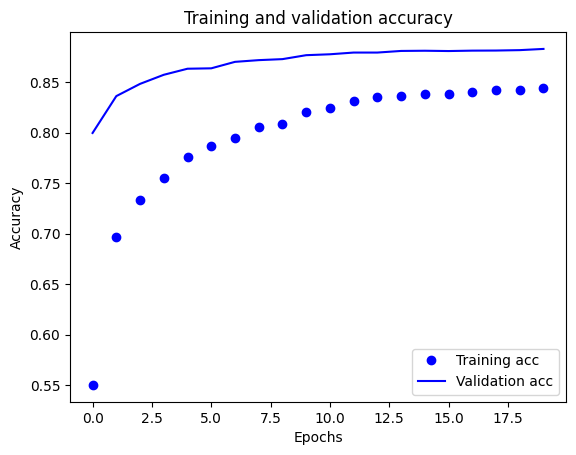

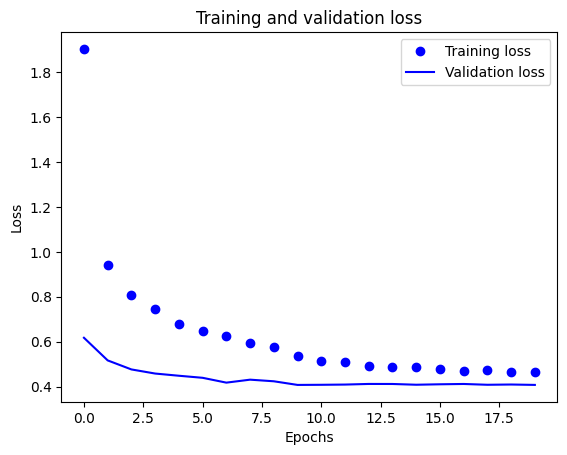

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'bo', label='Training acc')
plt.plot(history.history['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], 'bo', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
val_loss, val_acc = model.evaluate(validation_dataset)
print('Validation Accuracy:', val_acc)


313/313 [==============================] - 22s 69ms/step - loss: 0.4079 - accuracy: 0.8766
Validation Accuracy: 0.8766000270843506


In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print(f"Loss: {loss}, Accuracy: {accuracy}")

313/313 [==============================] - 22s 70ms/step - loss: 0.3914 - accuracy: 0.8774
Loss: 0.39137837290763855, Accuracy: 0.8773999810218811


1/1 [==============================] - 0s 150ms/step


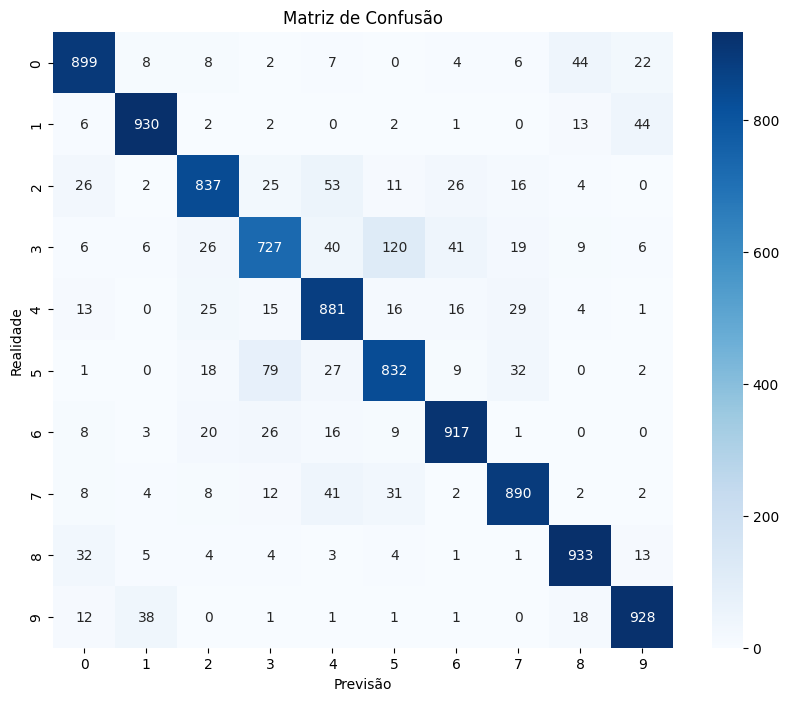

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1000
           1       0.93      0.93      0.93      1000
           2       0.88      0.84      0.86      1000
           3       0.81      0.73      0.77      1000
           4       0.82      0.88      0.85      1000
           5       0.81      0.83      0.82      1000
           6       0.90      0.92      0.91      1000
           7       0.90      0.89      0.89      1000
           8       0.91      0.93      0.92      1000
           9       0.91      0.93      0.92      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



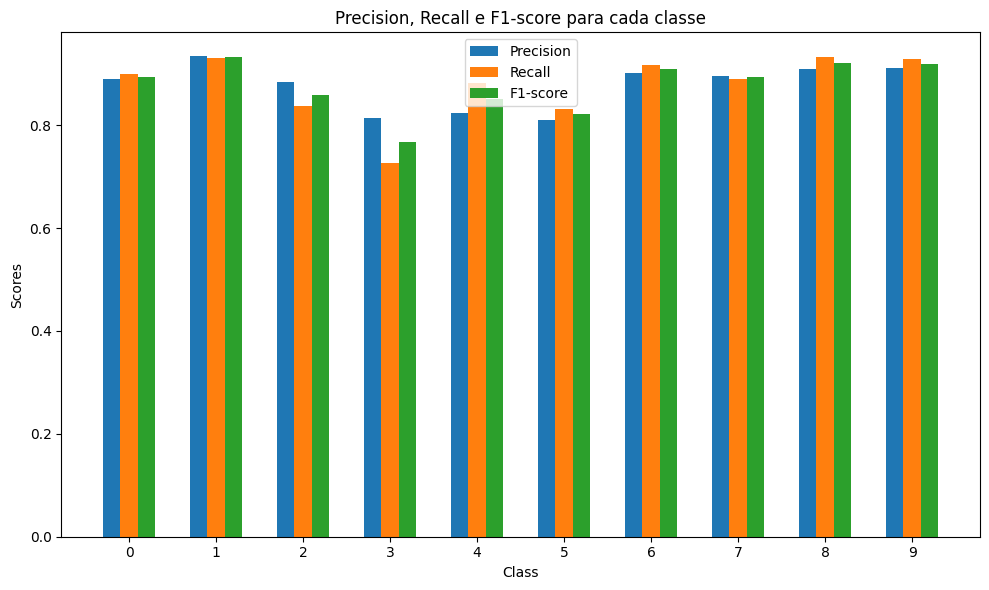

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to evaluate the model and get true and predicted labels
def evaluate_model(model, dataset):
    all_labels = []
    all_predictions = []

    for images, labels in dataset:
        predictions = model.predict(images)
        predicted_labels = np.argmax(predictions, axis=1)
        true_labels = labels.numpy()  # Convert to numpy array if not already

        all_labels.extend(true_labels)
        all_predictions.extend(predicted_labels)

    return np.array(all_labels), np.array(all_predictions)

# Get true and predicted labels for the test dataset
true_labels, predicted_labels = evaluate_model(model, test_dataset)

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Realidade')
plt.show()

# Print classification report
class_names = [str(i) for i in range(10)]  # Define class names based on your dataset
print(classification_report(true_labels, predicted_labels, target_names=class_names))

# Extract precision, recall, and F1-score for each class from classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names, output_dict=True)

metrics = {'precision': [], 'recall': [], 'f1-score': []}
for cls in class_names:
    metrics['precision'].append(report[cls]['precision'])
    metrics['recall'].append(report[cls]['recall'])
    metrics['f1-score'].append(report[cls]['f1-score'])

# Plot precision, recall, and F1-score
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(class_names))

plt.bar(index, metrics['precision'], bar_width, label='Precision')
plt.bar(index + bar_width, metrics['recall'], bar_width, label='Recall')
plt.bar(index + 2*bar_width, metrics['f1-score'], bar_width, label='F1-score')

plt.xlabel('Class')
plt.ylabel('Scores')
plt.title('Precision, Recall e F1-score para cada classe')
plt.xticks(index + bar_width, class_names)
plt.legend()

plt.tight_layout()
plt.show()